In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score,confusion_matrix
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Data_Set\Fake.csv")

In [3]:
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df["label"] = 0

In [5]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
df_real = pd.read_csv(r"C:\Users\hp\Desktop\Data_Set\True.csv")

In [7]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
df_real["label"] = 1

In [9]:
df_real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
data = pd.concat([df,df_real],ignore_index=True)

In [11]:
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
data.to_csv("text_data_set_news.csv",index=False)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
data.isnull().any()

title      False
text       False
subject    False
date       False
label      False
dtype: bool

In [15]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [16]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [17]:
data.shape

(44898, 5)

In [18]:
data.tail()

,title,text,subject,date,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [19]:
data.isnull().any()

title      False
text       False
subject    False
date       False
label      False
dtype: bool

In [20]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [22]:
data.drop(["date"],inplace=True,axis=1)

In [23]:
data.drop(["subject"],inplace=True,axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

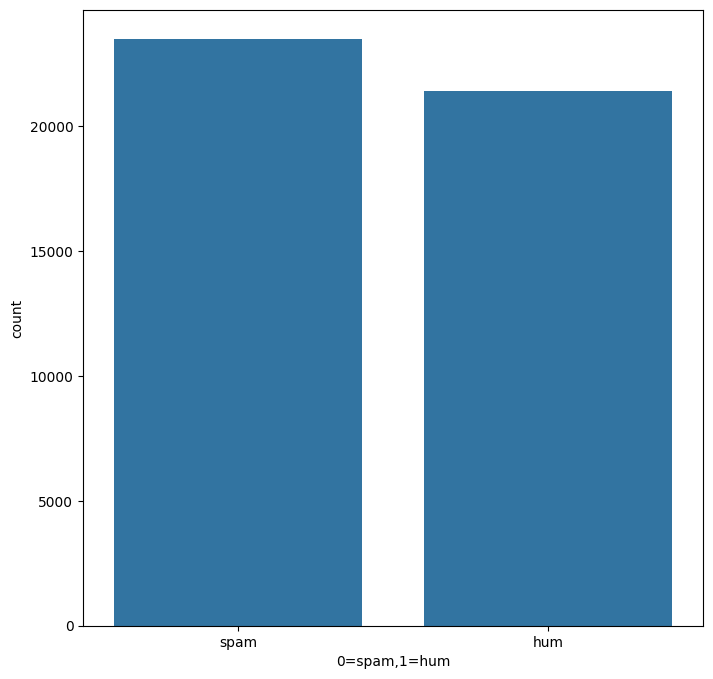

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(x=data["label"])
plt.xlabel("0=spam,1=hum")
plt.ylabel("count")
plt.xticks([0,1],['spam','hum'])
plt.show

In [25]:
def plot_wordcloud(text,title):
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)



    

In [26]:
fake_news = " ".join(data[data["label"]==0]["text"])
real_news = " ".join(data[data["label"]==1]["text"])

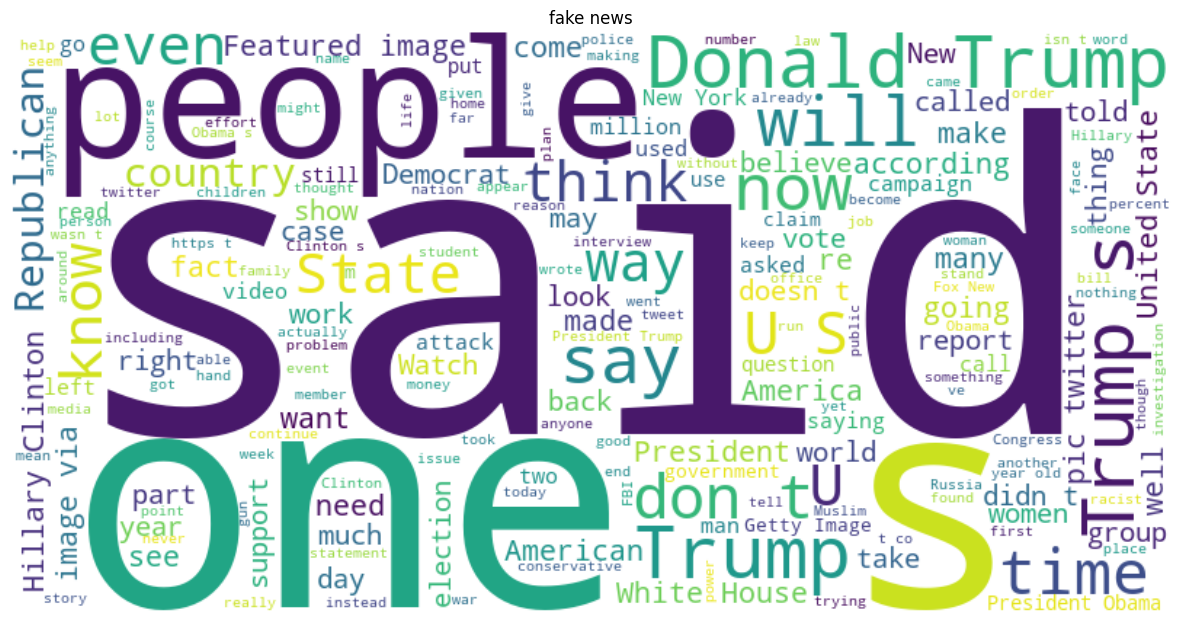

In [27]:
plot_wordcloud(fake_news,"fake news")
plt.show()

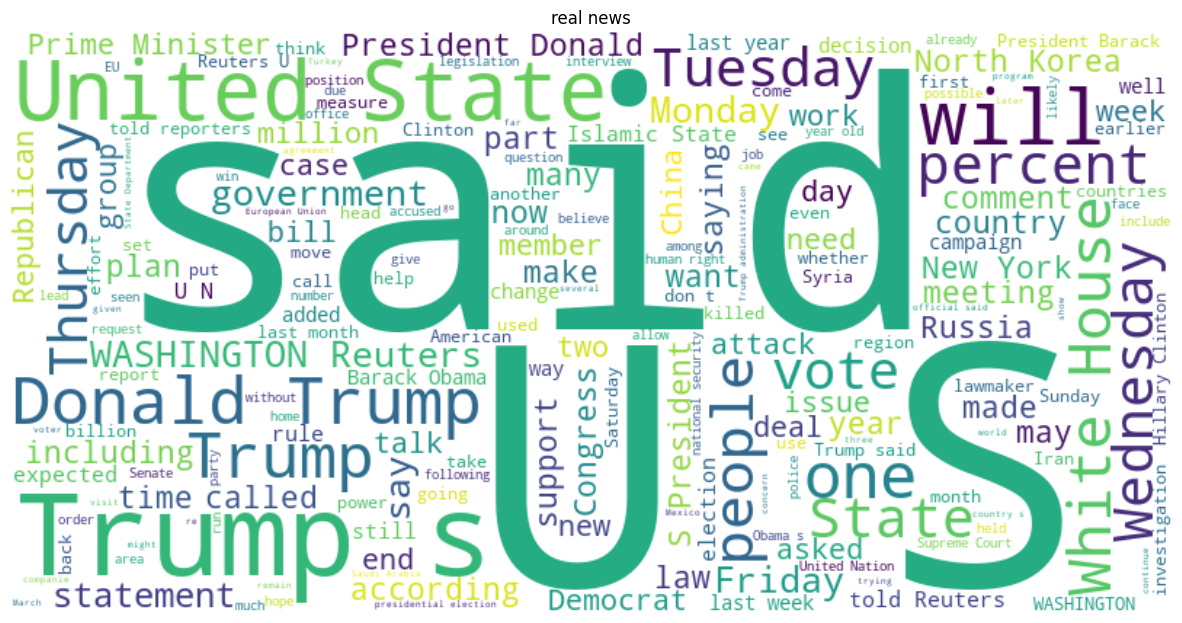

In [28]:
plot_wordcloud(real_news,"real news")
plt.show()

In [29]:
text_column = 'text'
label_column = 'label'

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
enligh_stopword = set(stopwords.words('english'))
english_punctuation = string.punctuation

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def text_preprocessing(text):
    romov_punc = [char for char in text if char not in english_punctuation]
    clean_text = "".join(romov_punc) 

    words=clean_text.split()
    text = ([word for word in words if word.lower() not in enligh_stopword ])
    return text

In [34]:
data[text_column]=data[text_column].apply(text_preprocessing)

In [35]:
data[text_column]

0        [Donald, Trump, wish, Americans, Happy, New, Y...
1        [House, Intelligence, Committee, Chairman, Dev...
2        [Friday, revealed, former, Milwaukee, Sheriff,...
3        [Christmas, day, Donald, Trump, announced, wou...
4        [Pope, Francis, used, annual, Christmas, Day, ...
                               ...                        
44893    [BRUSSELS, Reuters, NATO, allies, Tuesday, wel...
44894    [LONDON, Reuters, LexisNexis, provider, legal,...
44895    [MINSK, Reuters, shadow, disused, Sovietera, f...
44896    [MOSCOW, Reuters, Vatican, Secretary, State, C...
44897    [JAKARTA, Reuters, Indonesia, buy, 11, Sukhoi,...
Name: text, Length: 44898, dtype: object

In [36]:
data[text_column][0]

['Donald',
 'Trump',
 'wish',
 'Americans',
 'Happy',
 'New',
 'Year',
 'leave',
 'Instead',
 'give',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'former',
 'reality',
 'show',
 'star',
 'one',
 'job',
 'Country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'Fake',
 'News',
 'Media',
 'Happy',
 'Healthy',
 'New',
 'Year',
 'President',
 'Angry',
 'Pants',
 'tweeted',
 '2018',
 'great',
 'year',
 'America',
 'Country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'Fake',
 'News',
 'Media',
 'Happy',
 'Healthy',
 'New',
 'Year',
 '2018',
 'great',
 'year',
 'America',
 'Donald',
 'J',
 'Trump',
 'realDonaldTrump',
 'December',
 '31',
 '2017Trump',
 'tweet',
 'went',
 'welll',
 'expectWhat',
 'kind',
 'president',
 'sends',
 'New',
 'Year',
 'greeting',
 'like',
 'despica

In [37]:
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
def lemmatizer_text(text):
    lemmatizer_text = ' ' .join(lemmatizer.lemmatize(word) for word in text)
    return lemmatizer_text

data[text_column] = data[text_column].apply(lemmatizer_text)

In [39]:
data[text_column]

0        Donald Trump wish Americans Happy New Year lea...
1        House Intelligence Committee Chairman Devin Nu...
2        Friday revealed former Milwaukee Sheriff David...
3        Christmas day Donald Trump announced would bac...
4        Pope Francis used annual Christmas Day message...
                               ...                        
44893    BRUSSELS Reuters NATO ally Tuesday welcomed Pr...
44894    LONDON Reuters LexisNexis provider legal regul...
44895    MINSK Reuters shadow disused Sovietera factory...
44896    MOSCOW Reuters Vatican Secretary State Cardina...
44897    JAKARTA Reuters Indonesia buy 11 Sukhoi fighte...
Name: text, Length: 44898, dtype: object

In [40]:
data[text_column][0]

'Donald Trump wish Americans Happy New Year leave Instead give shout enemy hater dishonest fake news medium former reality show star one job Country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest Fake News Media Happy Healthy New Year President Angry Pants tweeted 2018 great year America Country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest Fake News Media Happy Healthy New Year 2018 great year America Donald J Trump realDonaldTrump December 31 2017Trump tweet went welll expectWhat kind president sends New Year greeting like despicable petty infantile gibberish Trump lack decency even allow rise gutter long enough wish American citizen happy new year Bishop Talbert Swan TalbertSwan December 31 2017no one like Calvin calvinstowell December 31 2017Your impeachment would make 2018 great year America also accept regaining control Congress Miranda Yaver mirandayaver December 31 2017Do hear talk include many people 

In [41]:
vectorizer = TfidfVectorizer()

In [42]:
x = vectorizer.fit_transform(data[text_column])
y = data[label_column]


In [43]:
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7292777 stored elements and shape (44898, 221794)>

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.70,random_state=2)

In [45]:
model_1 = MultinomialNB()
model_2 = BernoulliNB()

In [46]:
model_1.fit(xtrain,ytrain)

MultinomialNB()

In [47]:
model_1.score(xtrain,ytrain)

0.9600038182512409

In [48]:
model_1.score(xtest,ytest)

0.9521900519673349

In [49]:
model_2 .fit(xtrain,ytrain)

BernoulliNB()

In [50]:
model_2.score(xtrain,ytrain)

0.9856179203258241

In [51]:
model_2.score(xtest,ytest)

0.9793615441722346

In [52]:
y_pre_model_1 = model_1.predict(xtrain)
y_test_model_1 = model_1.predict(xtest)

In [53]:
y_pre_model_2 = model_2.predict(xtrain)
y_test_model_2 = model_2.predict(xtest)

In [54]:
acc_train_model_1 = accuracy_score(ytrain,y_pre_model_1)
confu_train_model_1 = confusion_matrix(ytrain,y_pre_model_1)
print("Model Evluction With Train Data")
print(acc_train_model_1)
print(confu_train_model_1)

Model Evluction With Train Data
0.9600038182512409
[[15598   853]
 [  404 14573]]


In [55]:
acc_test_model_1 = accuracy_score(ytest,y_test_model_1)
confu_test_model_1 = confusion_matrix(ytest,y_test_model_1)
print("Model Evluction With Test Data")
print(acc_test_model_1)
print(confu_test_model_1)

Model Evluction With Test Data
0.9521900519673349
[[6590  440]
 [ 204 6236]]


In [56]:
acc_train_model_2 = accuracy_score(ytrain,y_pre_model_2)
confu_train_model_2 = confusion_matrix(ytrain,y_pre_model_2)
print("Model Evluction With Train Data")
print(acc_train_model_2)
print(confu_train_model_2)

Model Evluction With Train Data
0.9856179203258241
[[16059   392]
 [   60 14917]]


In [57]:
acc_test_model_2 = accuracy_score(ytest,y_test_model_2)
confu_test_model_2 = confusion_matrix(ytest,y_test_model_2)
print("Model Evluction With Test Data")
print(acc_test_model_2)
print(confu_test_model_2)

Model Evluction With Test Data
0.9793615441722346
[[6802  228]
 [  50 6390]]


In [58]:
model_1_path_file = "MultinomialNB_model.pkl"
with open(model_1_path_file, "wb") as file:
    pickle.dump(model_1, file)

print("Model saved successfully!")

Model saved successfully!


In [59]:
model_2_path_file = "BernoulliNB_model.pkl"
with open(model_2_path_file, "wb") as file:
    pickle.dump(model_2, file)

print("Model saved successfully!")

Model saved successfully!
